Data loaded successfully.


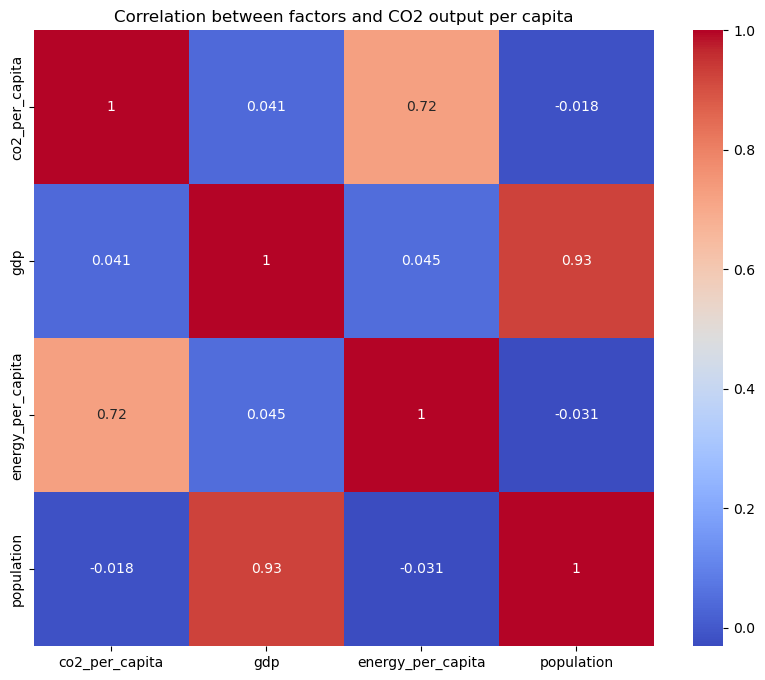

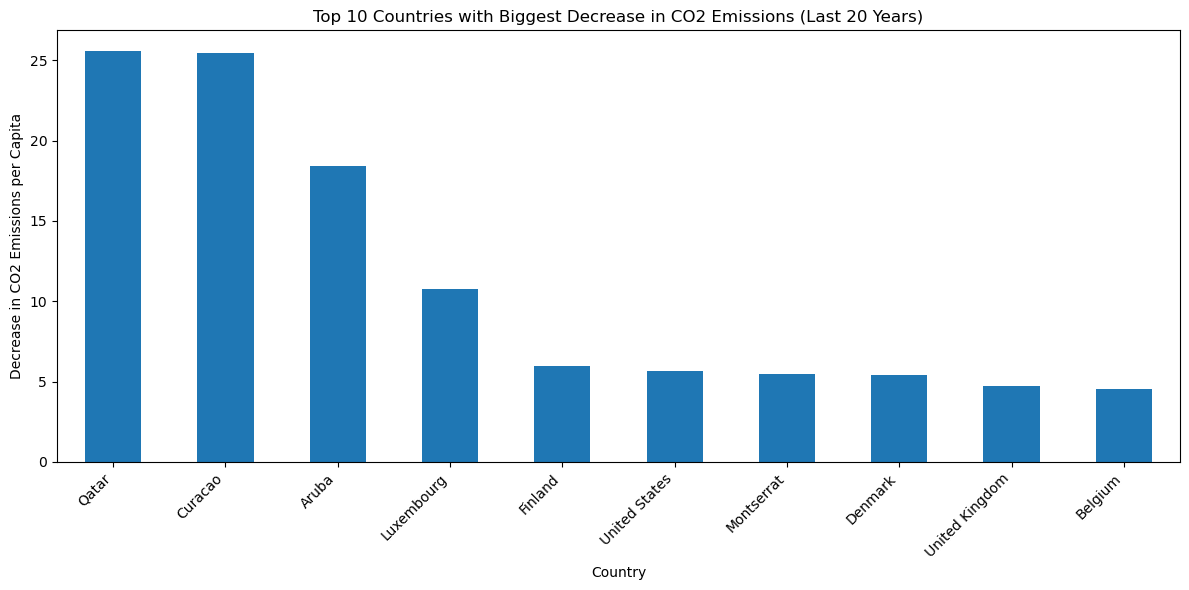

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the data
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(url)

print("Data loaded successfully.")

# Make a copy of the DataFrame to avoid warnings
df_copy = df.copy()

# Question 1: What is the biggest predictor of a large CO2 output per capita of a country?

# Select relevant columns
columns_of_interest = ['co2_per_capita', 'gdp', 'energy_per_capita', 'population']
df_correlation = df_copy[columns_of_interest].dropna()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlation.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between factors and CO2 output per capita')
plt.show()

# Question 2: Which countries are making the biggest strides in decreasing CO2 output?

# Filter data for the last 20 years
current_year = df_copy['year'].max()
df_filtered = df_copy[df_copy['year'] >= current_year - 20]

# Calculate the change in CO2 emissions for each country
def calculate_co2_change(group):
    first = group.iloc[0]['co2_per_capita']
    last = group.iloc[-1]['co2_per_capita']
    return first - last if not pd.isna(first) and not pd.isna(last) else np.nan

co2_change = df_filtered.groupby('country').apply(calculate_co2_change).sort_values(ascending=False)

# Plot top 10 countries with biggest decrease
plt.figure(figsize=(12, 6))
co2_change[:10].plot(kind='bar')
plt.title('Top 10 Countries with Biggest Decrease in CO2 Emissions (Last 20 Years)')
plt.xlabel('Country')
plt.ylabel('Decrease in CO2 Emissions per Capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


nuclear_consumption:
  Annual growth rate: 143.66 TWh/year
  Projected consumption in 2050: 12838.80 TWh

hydro_consumption:
  Annual growth rate: 150.90 TWh/year
  Projected consumption in 2050: 15515.11 TWh

solar_consumption:
  Annual growth rate: 30.78 TWh/year
  Projected consumption in 2050: 2071.01 TWh

wind_consumption:
  Annual growth rate: 63.84 TWh/year
  Projected consumption in 2050: 4362.41 TWh



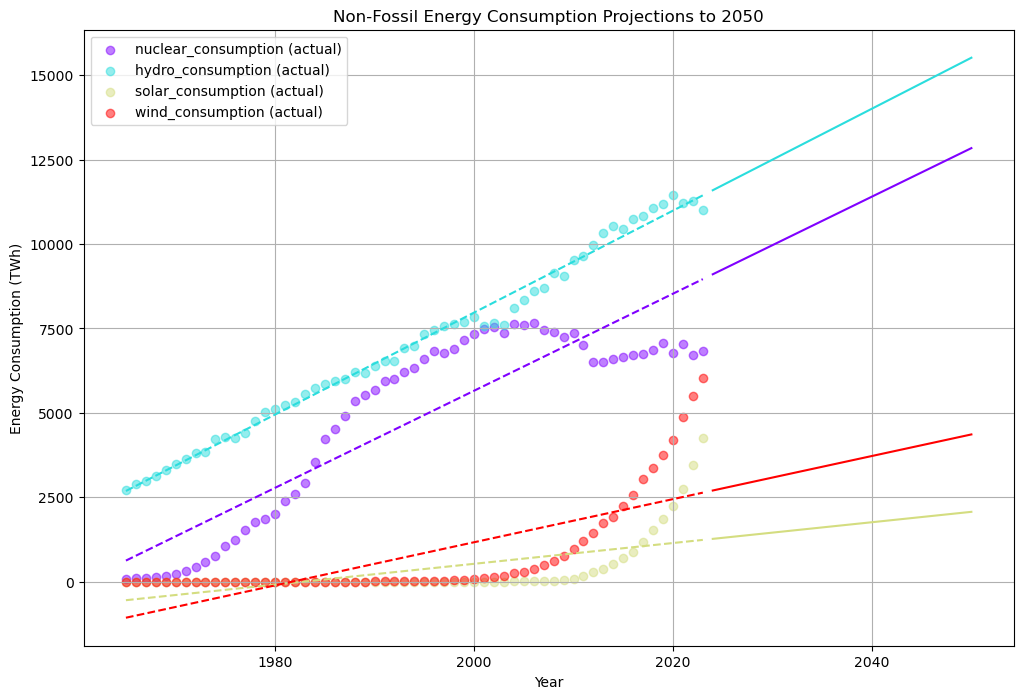

The non-fossil energy source with the highest projected consumption in 2050 is: hydro_consumption
Projected consumption: 15515.11 TWh


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Fetch the data
url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
df = pd.read_csv(url)

# Focus on global data and relevant non-fossil energy sources
df = df[df['country'] == 'World']
non_fossil_sources = ['nuclear_consumption', 'hydro_consumption', 'solar_consumption', 'wind_consumption']
df = df[['year'] + non_fossil_sources].dropna()

# Perform linear regression and plot results
plt.figure(figsize=(12, 8))
current_year = df['year'].max()
future_years = np.array(range(current_year + 1, 2051))
colors = plt.cm.rainbow(np.linspace(0, 1, len(non_fossil_sources)))

projections_2050 = {}

for source, color in zip(non_fossil_sources, colors):
    X = df['year'].values.reshape(-1, 1)
    y = df[source].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    future_pred = model.predict(future_years.reshape(-1, 1))
    
    plt.scatter(df['year'], y, color=color, alpha=0.5, label=f'{source} (actual)')
    plt.plot(df['year'], y_pred, color=color, linestyle='--')
    plt.plot(future_years, future_pred, color=color)
    
    print(f"{source}:")
    print(f"  Annual growth rate: {model.coef_[0]:.2f} TWh/year")
    print(f"  Projected consumption in 2050: {future_pred[-1]:.2f} TWh")
    print()
    
    projections_2050[source] = future_pred[-1]

plt.title('Non-Fossil Energy Consumption Projections to 2050')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend()
plt.grid(True)
plt.show()

# Find the source with the highest projected consumption in 2050
highest_consumption_source = max(projections_2050, key=projections_2050.get)
print(f"The non-fossil energy source with the highest projected consumption in 2050 is: {highest_consumption_source}")
print(f"Projected consumption: {projections_2050[highest_consumption_source]:.2f} TWh")